In [12]:
#import libraries
import os,cv2
import numpy as np
import matplotlib.pyplot as plt

from sklearn.utils import shuffle
from sklearn.cross_validation import train_test_split

from keras import backend as K
K.set_image_dim_ordering('th')

from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD,RMSprop,adam

In [13]:
PATH1=os.chdir('C:/Users/Ravi/Desktop/keras own data cnn_files')
PATH = os.getcwd()
PATH

'C:\\Users\\Ravi\\Desktop\\keras own data cnn_files'

In [14]:
# Define data path
data_path = PATH + '/data'
data_dir_list = os.listdir(data_path)

img_rows=227
img_cols=227
num_channel=3
num_epoch=20

In [15]:
# Define the number of classes
num_classes = 4

img_data_list=[]

for dataset in data_dir_list:
	img_list=os.listdir(data_path+'/'+ dataset)
	print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
	for img in img_list:
		input_img=cv2.imread(data_path + '/'+ dataset + '/'+ img )
		img_data_list.append(input_img)

img_data = np.array(img_data_list)
img_data = img_data.astype('float32')
img_data /= 255
print (img_data.shape)

Loaded the images of dataset-cats

Loaded the images of dataset-dogs

Loaded the images of dataset-horses

Loaded the images of dataset-humans

(808, 227, 227, 3)


In [16]:
# choosing channel modes for various frameworks, NHWC for tensorflow, NCHW for theano
if num_channel==1:
	if K.image_dim_ordering()=='th':
		img_data= np.expand_dims(img_data, axis=1) 
		print (img_data.shape)
	else:
		img_data= np.expand_dims(img_data, axis=4) 
		print (img_data.shape)
		
else:
	if K.image_dim_ordering()=='th':
		img_data=np.rollaxis(img_data,3,1)
		print (img_data.shape)

(808, 3, 227, 227)


In [17]:
# Assigning Labels

# Define the number of classes
num_classes = 4

num_of_samples = img_data.shape[0]
labels = np.ones((num_of_samples,),dtype='int64')

labels[0:202]=0
labels[202:404]=1
labels[404:606]=2
labels[606:]=3
	  
names = ['cats','dogs','horses','humans']

In [18]:
# convert class labels to on-hot encoding
Y = np_utils.to_categorical(labels, num_classes)

#Shuffle the dataset
x,y = shuffle(img_data,Y, random_state=2)
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [19]:
#%%
# Defining the model
input_shape=img_data[0].shape
print(input_shape)

(3, 227, 227)


In [91]:
model = Sequential()
model.add(Conv2D(96, (11,11), strides=(4, 4), padding='valid',input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2,2), padding='valid', data_format=None))
model.add(Conv2D(256, (5,5), strides=(1, 1), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2,2), padding='valid', data_format=None))
model.add(Conv2D(384, (3,3), strides=(1, 1), padding='valid'))
model.add(Activation('relu'))
model.add(Conv2D(384, (3,3), strides=(1, 1), padding='valid'))
model.add(Activation('relu'))
model.add(Conv2D(256, (3,3), strides=(1, 1), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2,2), padding='valid', data_format=None))
model.add(Flatten())
model.add(Dense(4096))
model.add(Activation('relu'))
model.add(Dropout(0.9))
model.add(Dense(4096))
model.add(Activation('relu'))
model.add(Dropout(0.9))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [92]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_61 (Conv2D)           (None, 96, 55, 55)        34944     
_________________________________________________________________
activation_87 (Activation)   (None, 96, 55, 55)        0         
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 96, 27, 27)        0         
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 256, 27, 27)       614656    
_________________________________________________________________
activation_88 (Activation)   (None, 256, 27, 27)       0         
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 256, 13, 13)       0         
_________________________________________________________________
conv2d_63 (Conv2D)           (None, 384, 11, 11)       885120    
__________

In [93]:
model.get_config()

[{'class_name': 'Conv2D',
  'config': {'activation': 'linear',
   'activity_regularizer': None,
   'batch_input_shape': (None, 3, 227, 227),
   'bias_constraint': None,
   'bias_initializer': {'class_name': 'Zeros', 'config': {}},
   'bias_regularizer': None,
   'data_format': 'channels_first',
   'dilation_rate': (1, 1),
   'dtype': 'float32',
   'filters': 96,
   'kernel_constraint': None,
   'kernel_initializer': {'class_name': 'VarianceScaling',
    'config': {'distribution': 'uniform',
     'mode': 'fan_avg',
     'scale': 1.0,
     'seed': None}},
   'kernel_regularizer': None,
   'kernel_size': (11, 11),
   'name': 'conv2d_61',
   'padding': 'valid',
   'strides': (4, 4),
   'trainable': True,
   'use_bias': True}},
 {'class_name': 'Activation',
  'config': {'activation': 'relu',
   'name': 'activation_87',
   'trainable': True}},
 {'class_name': 'MaxPooling2D',
  'config': {'data_format': 'channels_first',
   'name': 'max_pooling2d_37',
   'padding': 'valid',
   'pool_size': (3

In [94]:
model.layers[0].get_config()

{'activation': 'linear',
 'activity_regularizer': None,
 'batch_input_shape': (None, 3, 227, 227),
 'bias_constraint': None,
 'bias_initializer': {'class_name': 'Zeros', 'config': {}},
 'bias_regularizer': None,
 'data_format': 'channels_first',
 'dilation_rate': (1, 1),
 'dtype': 'float32',
 'filters': 96,
 'kernel_constraint': None,
 'kernel_initializer': {'class_name': 'VarianceScaling',
  'config': {'distribution': 'uniform',
   'mode': 'fan_avg',
   'scale': 1.0,
   'seed': None}},
 'kernel_regularizer': None,
 'kernel_size': (11, 11),
 'name': 'conv2d_61',
 'padding': 'valid',
 'strides': (4, 4),
 'trainable': True,
 'use_bias': True}

In [95]:
model.layers[0].input_shape

(None, 3, 227, 227)

In [96]:
model.layers[0].output_shape

(None, 96, 55, 55)

In [97]:
model.layers[0].get_weights()

[array([[[[  1.78e-02,   1.80e-02,   5.65e-03, ...,  -1.05e-02,  -8.39e-03,
            -4.63e-03],
          [  4.82e-03,  -3.79e-03,  -4.87e-03, ...,   1.77e-02,  -1.71e-02,
            -2.13e-02],
          [  3.99e-03,  -1.40e-02,   1.31e-02, ...,   1.48e-02,   1.72e-02,
            -8.71e-03]],
 
         [[ -8.59e-03,   2.20e-02,  -1.72e-02, ...,   1.05e-02,  -1.63e-02,
             2.20e-02],
          [ -2.55e-03,  -2.06e-02,  -1.95e-02, ...,   1.81e-05,  -5.88e-03,
            -1.66e-02],
          [ -2.98e-03,  -1.22e-02,  -9.43e-03, ...,  -1.35e-02,  -6.39e-03,
            -2.93e-03]],
 
         [[ -1.83e-02,   9.73e-03,   2.19e-02, ...,   4.86e-03,  -2.07e-02,
             1.59e-02],
          [  2.18e-02,  -1.07e-02,  -1.62e-02, ...,  -9.03e-03,  -1.50e-02,
            -1.62e-02],
          [  1.43e-02,  -9.51e-03,  -4.62e-03, ...,   1.27e-02,  -4.29e-03,
            -9.46e-03]],
 
         ..., 
         [[ -7.07e-03,  -3.17e-03,  -1.40e-02, ...,   2.15e-02,   6.76e-03,


In [98]:
np.shape(model.layers[0].get_weights()[0])

(11, 11, 3, 96)

In [99]:
model.layers[0].trainable

True

In [100]:
#sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
#model.compile(loss='categorical_crossentropy', optimizer=sgd,metrics=["accuracy"])
model.compile(loss='categorical_crossentropy', optimizer='rmsprop',metrics=["accuracy"])


In [101]:
#%%
# Training
hist = model.fit(X_train, y_train, batch_size=16, nb_epoch=num_epoch, verbose=1, validation_data=(X_test, y_test))

#hist = model.fit(X_train, y_train, batch_size=32, nb_epoch=20,verbose=1, validation_split=0.2)

C:\Users\Ravi\Anaconda3\envs\theano_env\lib\site-packages\keras\models.py:939: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 646 samples, validate on 162 samples
Epoch 1/20
646/646 [==============================] - 77s 119ms/step - loss: 5.7512 - acc: 0.2771 - val_loss: 1.4040 - val_acc: 0.2037
Epoch 2/20
646/646 [==============================] - 81s 125ms/step - loss: 1.4006 - acc: 0.2245 - val_loss: 1.3956 - val_acc: 0.2037
Epoch 3/20
646/646 [==============================] - 75s 116ms/step - loss: 1.4048 - acc: 0.2399 - val_loss: 1.3914 - val_acc: 0.2531
Epoch 4/20
646/646 [==============================] - 78s 121ms/step - loss: 1.4042 - acc: 0.2539 - val_loss: 1.3899 - val_acc: 0.2531
Epoch 5/20
646/646 [==============================] - 79s 123ms/step - loss: 1.7860 - acc: 0.2895 - val_loss: 1.4087 - val_acc: 0.2531
Epoch 6/20
646/646 [==============================] - 82s 127ms/step - loss: 1.4268 - acc: 0.2260 - val_loss: 1.3943 - val_acc: 0.2469
Epoch 7/20
646/646 [==============================] - 76s 117ms/step - loss: 1.4064 - acc: 0.2368 - val_loss: 1.3968 - val_acc: 0.2037
Epoch 8/2

In [102]:
# Training with callbacks
from keras import callbacks

filename='model_train_new.csv'
csv_log=callbacks.CSVLogger(filename, separator=',', append=False)

early_stopping=callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='min')

filepath="Best-weights-my_model-{epoch:03d}-{loss:.4f}-{acc:.4f}.hdf5"

checkpoint = callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

callbacks_list = [csv_log,early_stopping,checkpoint]

hist = model.fit(X_train, y_train, batch_size=16, nb_epoch=num_epoch, verbose=1, validation_data=(X_test, y_test),callbacks=callbacks_list)


Train on 646 samples, validate on 162 samples
Epoch 1/20


C:\Users\Ravi\Anaconda3\envs\theano_env\lib\site-packages\keras\models.py:939: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


646/646 [==============================] - 105s 162ms/step - loss: 1.3994 - acc: 0.2523 - val_loss: 1.3946 - val_acc: 0.2037
Epoch 2/20
646/646 [==============================] - 99s 154ms/step - loss: 1.3979 - acc: 0.2415 - val_loss: 1.3954 - val_acc: 0.2037


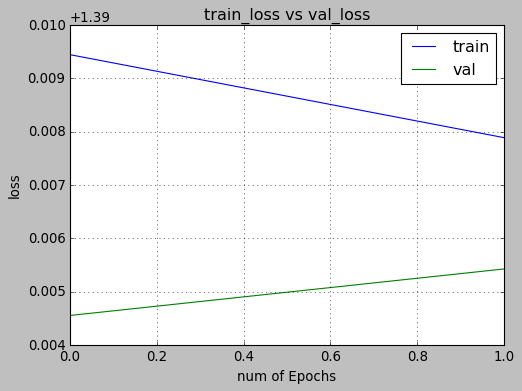

In [103]:
# visualizing losses and accuracy
train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['acc']
val_acc=hist.history['val_acc']
xc=range(2)

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)


plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])
plt.show()

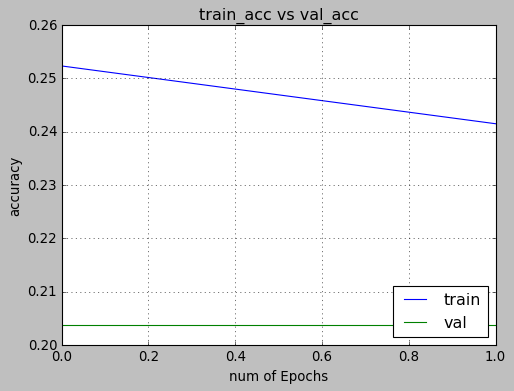

In [104]:
plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)

plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])
plt.show()

In [105]:
# Evaluating the model

score = model.evaluate(X_test, y_test, verbose=0)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

test_image = X_test[0:1]
print (test_image.shape)

print(model.predict(test_image))
print(model.predict_classes(test_image))
print(y_test[0:1])

Test Loss: 1.39542580534
Test accuracy: 0.203703703704
(1, 3, 227, 227)
[[ 0.24  0.25  0.27  0.24]]
[2]
[[ 0.  0.  1.  0.]]


In [106]:
# Testing a new image
test_image =cv2.imread('C:/Users/Ravi/Desktop/keras own data cnn_files/data/humans/rider-5.jpg.jpg')
#test_image=cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)
#test_image=cv2.resize(test_image,(227,227))
test_image = np.array(test_image)
test_image = test_image.astype('float32')
test_image /= 255
print (test_image.shape)

   

(227, 227, 3)


In [107]:
if num_channel==1:
	if K.image_dim_ordering()=='th':
		test_image= np.expand_dims(test_image, axis=0)
		test_image= np.expand_dims(test_image, axis=0)
		print (test_image.shape)
	else:
		test_image= np.expand_dims(test_image, axis=3) 
		test_image= np.expand_dims(test_image, axis=0)
		print (test_image.shape)
		
else:
	if K.image_dim_ordering()=='th':
		test_image=np.rollaxis(test_image,2,0)
		test_image= np.expand_dims(test_image, axis=0)
		print (test_image.shape)
	else:
		test_image= np.expand_dims(test_image, axis=0)
		print (test_image.shape)

(1, 3, 227, 227)


In [108]:
# Predicting the test image
print((model.predict(test_image)))
print(model.predict_classes(test_image))

[[ 0.24  0.25  0.27  0.24]]
[2]


In [109]:
# Visualizing the intermediate layer

#
def get_featuremaps(model, layer_idx, X_batch):
	get_activations = K.function([model.layers[0].input, K.learning_phase()],[model.layers[layer_idx].output,])
	activations = get_activations([X_batch,0])
	return activations

(1, 1, 96, 27, 27)
(96, 27, 27)
(27, 27, 96)


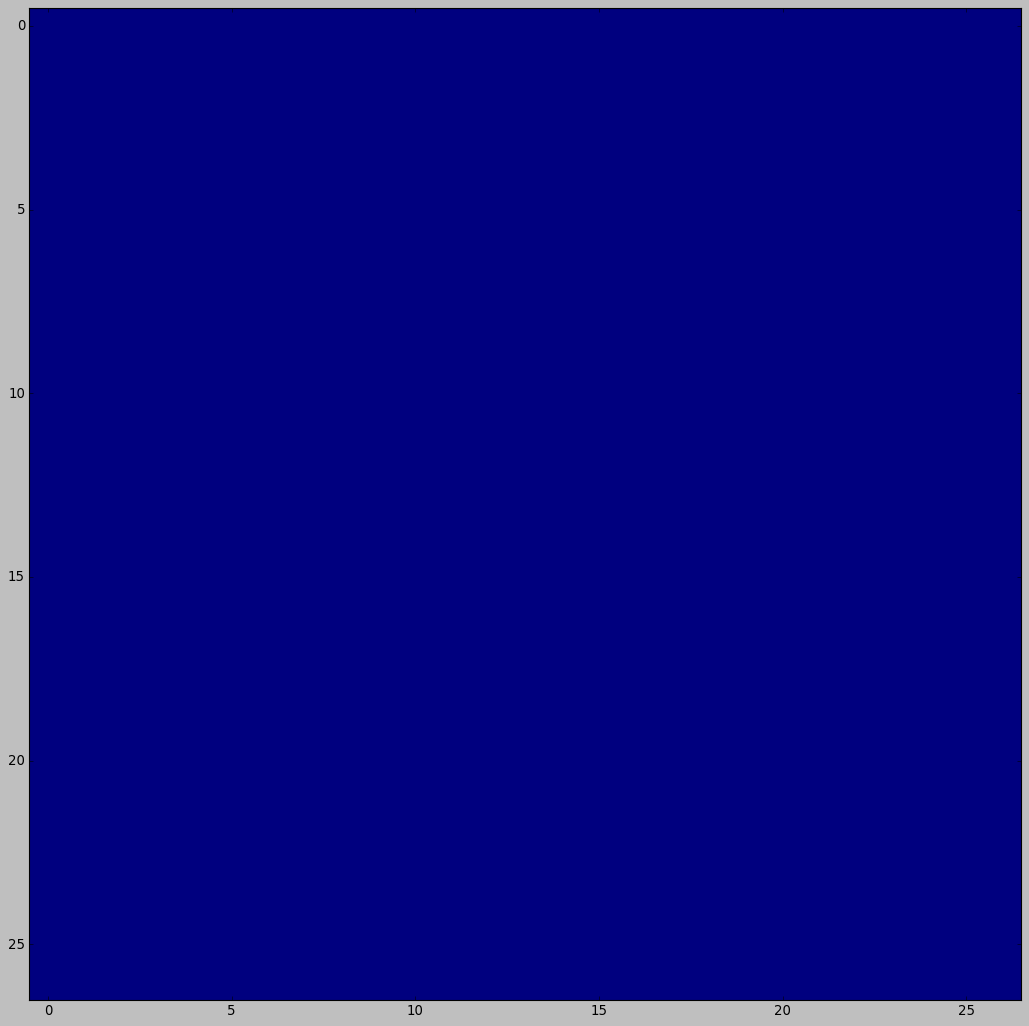

In [110]:
layer_num=2
filter_num=0

activations = get_featuremaps(model, int(layer_num),test_image)

print (np.shape(activations))
feature_maps = activations[0][0]      
print (np.shape(feature_maps))

if K.image_dim_ordering()=='th':
	feature_maps=np.rollaxis((np.rollaxis(feature_maps,2,0)),2,0)
print (feature_maps.shape)

fig=plt.figure(figsize=(16,16))
plt.imshow(feature_maps[:,:,filter_num], cmap='jet', interpolation='nearest')
plt.savefig("featuremaps-layer-{}".format(layer_num) + "-filternum-{}".format(filter_num)+'.jpg')
plt.show()

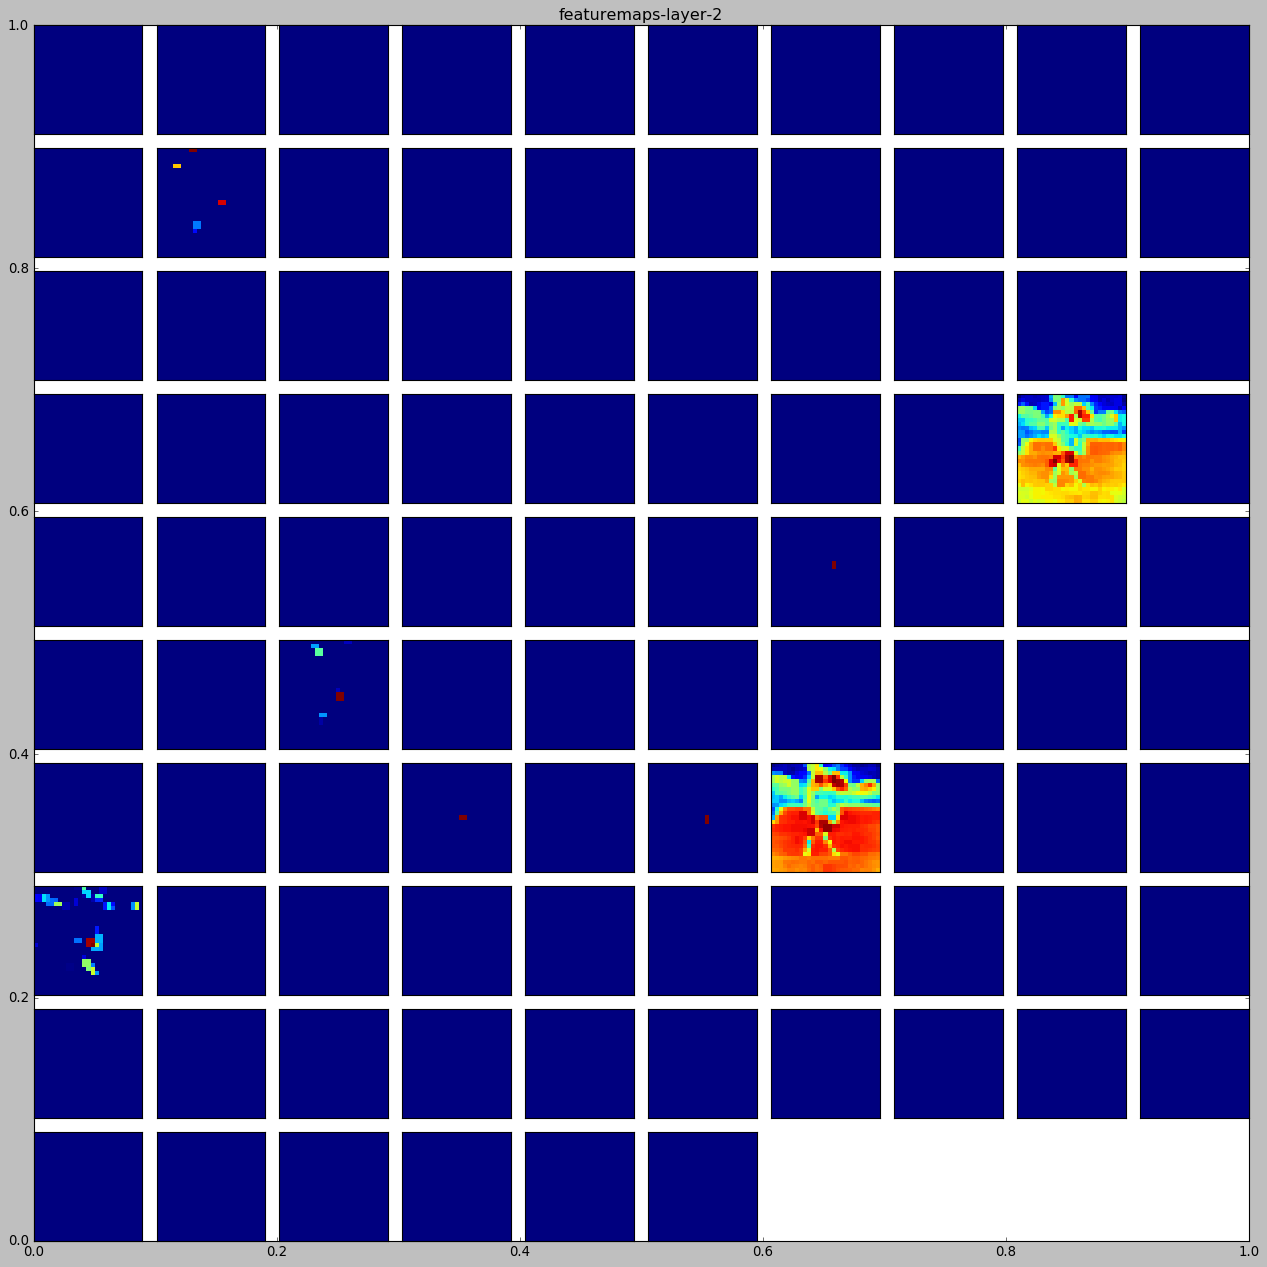

In [111]:
num_of_featuremaps=feature_maps.shape[2]
fig=plt.figure(figsize=(16,16))	
plt.title("featuremaps-layer-{}".format(layer_num))
subplot_num=int(np.ceil(np.sqrt(num_of_featuremaps)))
for i in range(int(num_of_featuremaps)):
	ax = fig.add_subplot(subplot_num, subplot_num, i+1)
	#ax.imshow(output_image[0,:,:,i],interpolation='nearest' ) #to see the first filter
	ax.imshow(feature_maps[:,:,i], cmap='jet', interpolation='nearest')
	plt.xticks([])
	plt.yticks([])
	plt.tight_layout()
plt.show()
fig.savefig("featuremaps-layer-{}".format(layer_num) + '.jpg')

#%%

In [112]:
# Printing the confusion matrix
from sklearn.metrics import classification_report,confusion_matrix
import itertools

Y_pred = model.predict(X_test)
print(Y_pred)
y_pred = np.argmax(Y_pred, axis=1)
print(y_pred)
#y_pred = model.predict_classes(X_test)
#print(y_pred)
target_names = ['class 0(cats)', 'class 1(Dogs)', 'class 2(Horses)','class 3(Humans)']
					
print(classification_report(np.argmax(y_test,axis=1), y_pred,target_names=target_names))

print(confusion_matrix(np.argmax(y_test,axis=1), y_pred))

[[ 0.24  0.25  0.27  0.24]
 [ 0.24  0.25  0.27  0.24]
 [ 0.24  0.25  0.27  0.24]
 [ 0.24  0.25  0.27  0.24]
 [ 0.24  0.25  0.27  0.24]
 [ 0.24  0.25  0.27  0.24]
 [ 0.24  0.25  0.27  0.24]
 [ 0.24  0.25  0.27  0.24]
 [ 0.24  0.25  0.27  0.24]
 [ 0.24  0.25  0.27  0.24]
 [ 0.24  0.25  0.27  0.24]
 [ 0.24  0.25  0.27  0.24]
 [ 0.24  0.25  0.27  0.24]
 [ 0.24  0.25  0.27  0.24]
 [ 0.24  0.25  0.27  0.24]
 [ 0.24  0.25  0.27  0.24]
 [ 0.24  0.25  0.27  0.24]
 [ 0.24  0.25  0.27  0.24]
 [ 0.24  0.25  0.27  0.24]
 [ 0.24  0.25  0.27  0.24]
 [ 0.24  0.25  0.27  0.24]
 [ 0.24  0.25  0.27  0.24]
 [ 0.24  0.25  0.27  0.24]
 [ 0.24  0.25  0.27  0.24]
 [ 0.24  0.25  0.27  0.24]
 [ 0.24  0.25  0.27  0.24]
 [ 0.24  0.25  0.27  0.24]
 [ 0.24  0.25  0.27  0.24]
 [ 0.24  0.25  0.27  0.24]
 [ 0.24  0.25  0.27  0.24]
 [ 0.24  0.25  0.27  0.24]
 [ 0.24  0.25  0.27  0.24]
 [ 0.24  0.25  0.27  0.24]
 [ 0.24  0.25  0.27  0.24]
 [ 0.24  0.25  0.27  0.24]
 [ 0.24  0.25  0.27  0.24]
 [ 0.24  0.25  0.27  0.24]
 

C:\Users\Ravi\Anaconda3\envs\theano_env\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [113]:
# Plotting the confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


Confusion matrix, without normalization
[[ 0  0 41  0]
 [ 0  0 40  0]
 [ 0  0 33  0]
 [ 0  0 48  0]]


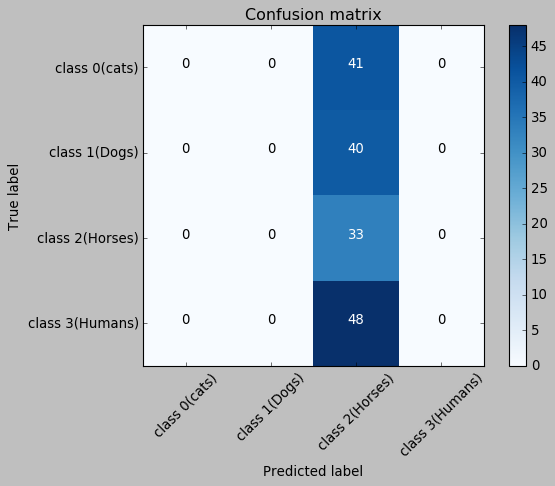

In [114]:
# Compute confusion matrix
cnf_matrix = (confusion_matrix(np.argmax(y_test,axis=1), y_pred))

np.set_printoptions(precision=2)

plt.figure()

# Plot non-normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=target_names,
                      title='Confusion matrix')
#plt.figure()
# Plot normalized confusion matrix
#plot_confusion_matrix(cnf_matrix, classes=target_names, normalize=True,
#                      title='Normalized confusion matrix')
#plt.figure()
plt.show()

In [115]:
#%%
# Saving and loading model and weights
from keras.models import model_from_json
from keras.models import load_model

# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("alexnetmodel.h5")
print("Saved model to disk")

# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("alexnetmodel.h5")
print("Loaded model from disk")

model.save('alexnetmodel.hdf5')
loaded_model=load_model('alexnetmodel.hdf5')

Saved model to disk
Loaded model from disk
